## <center>Practicals</center>

## Section 1: Preprocessing

### Practical 1:

Create a file people.txt and complete the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

(i) Read the data from the file "people.txt".

In [2]:
df=pd.read_csv('people.txt')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes


In [4]:
df.describe()

,Age,height,yearsmarried
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


(ii) Create a ruleset E that contain rules to check for the following conditions:<br>
1.The age should be in the range 0-150.

In [5]:
df['Rule1']=df['Age'].apply(lambda x: True if x>0 and x<150 else False)

2. The age should be greater than yearsmarried. 

In [6]:
df['Rule2']=df.apply(lambda x: True if x.Age> x.yearsmarried else False, axis=1)

3. The status should be married or single or widowed.

In [7]:
df['Rule3']=df['status'].apply(lambda x: True if x in ['married','single','widowed'] else False)

4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

In [8]:
df['Rule4']=df.apply(lambda x: True if ((x.Age<18 and x.agegroup=='child') or (x.Age>=18 and x.Age<=65 and x.agegroup=='adult') or (x.Age>65 and x.agegroup=='elderly')) else False, axis=1)

(iii) Check whether ruleset E is violated by the data in the file people.txt.

In [9]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


(iv) Summarize the results obtained in part (iii) 

In [10]:
df_followed_rules=df.iloc[:,5:]
df_followed_rules=df_followed_rules.astype(int)
df_followed_rules

,Rule1,Rule2,Rule3,Rule4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


(v) Visualize the results obtained in part (iii) 

Text(0, 0.5, 'Number of rules violated')

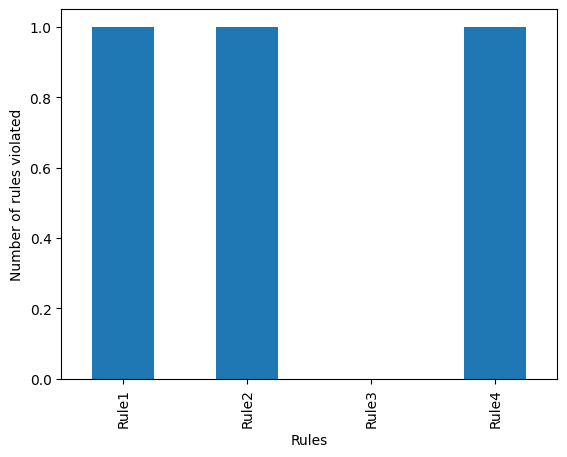

In [11]:
plt.figure()
df_followed_rules.apply(lambda x:len(x)-x.sum()).plot(kind='bar')
plt.xlabel('Rules')
plt.ylabel('Number of rules violated')

### Practical 2:

Perform the following preprocessing tasks on the dirty_iris dataset. 

In [12]:
data=pd.read_csv('iris_dirty.csv')
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  142 non-null    float64
 2   Sepal.Width   139 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
data.drop('Unnamed: 0',axis=1,inplace=True)

(i) Calculate the number and percentage of observations that are complete. 

In [15]:
data.isnull().sum()

Sepal.Length     8
Sepal.Width     11
Petal.Length     0
Petal.Width      0
Species          0
dtype: int64

In [16]:
data2=data.dropna(thresh=5)
data2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa


In [17]:
data2.shape

(131, 5)

In [18]:
num1=data2.shape
num=data.shape

In [19]:
num1=list(num1)
num=list(num)
print('The number of observations that are complete: ',num1[0])
print('The percentage of such observations: ',(num1[0]/num[0])*100)

The number of observations that are complete:  131
The percentage of such observations:  87.33333333333333


(ii) Replace all the special values in data with NA. 

In [20]:
data.iloc[:,:4]=data.iloc[:,:4].replace(np.inf, np.nan)
data.iloc[:,:4]=data.iloc[:,:4].replace(np.nan, np.nan)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa


(iii) Define these rules in a separate text file and read them. <br>
(Use editfile function in R (package editrules). Use similar function in Python). <br>
Print the resulting constraint object. <br>
– Species should be one of the following values: setosa, versicolor or virginica. <br>
– All measured numerical properties of an iris should be positive. <br>
– The petal length of an iris is at least 2 times its petal width. <br>
– The sepal length of an iris cannot exceed 30 cm. <br>
– The sepals of an iris are longer than its petals. 

In [21]:
rule1=data['Species'].apply(lambda x: True if x=='setosa' or x=='versicolor' or x=='virginica' else False)
rule2=data.iloc[:,:4].apply(lambda x: True if all(y>0 for y in x) else False, axis=1)
rule3=data.apply(lambda x: True if x['Petal.Length']>=x['Petal.Width'] else False, axis=1)
rule4=data['Sepal.Length'].apply(lambda x: True if x<=30 else False)
rule5=data.apply(lambda x: True if x['Sepal.Length']>x['Petal.Length'] else False, axis=1)

In [22]:
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)

0      False
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149     True
Name: Species, Length: 150, dtype: bool
0       True
1       True
2       True
3       True
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Length: 150, dtype: bool
0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool
0       True
1       True
2       True
3       True
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Name: Sepal.Length, Length: 150, dtype: bool
0       True
1       True
2       True
3       True
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Length: 150, dtype: bool


(iv) Determine how often each rule is broken (violatedEdits). Also summarize and plot the 
result.

In [23]:
data_rules=pd.DataFrame({'Rule1':rule1,'Rule2':rule2,'Rule3':rule3,'Rule4':rule4,'Rule5':rule5})
data_rules=data_rules.astype(int)
data_rules

,Rule1,Rule2,Rule3,Rule4,Rule5
0,0,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,0,1,0,0
...,...,...,...,...,...
145,1,1,1,1,1
146,1,1,1,1,1
147,1,1,1,1,1
148,1,1,1,1,1


In [24]:
data_rules['Rule1'].value_counts()

Rule1
1    145
0      5
Name: count, dtype: int64

In [25]:
data_rules['Rule2'].value_counts()

Rule2
1    131
0     19
Name: count, dtype: int64

In [26]:
data_rules['Rule3'].value_counts()

Rule3
1    150
Name: count, dtype: int64

In [27]:
data_rules['Rule4'].value_counts()

Rule4
1    142
0      8
Name: count, dtype: int64

In [28]:
data_rules['Rule5'].value_counts()

Rule5
1    142
0      8
Name: count, dtype: int64

Text(0, 0.5, 'Number of records that violates the rule')

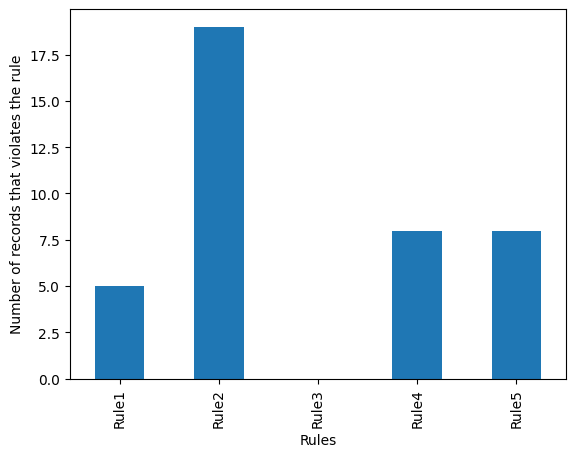

In [29]:
plt.figure()
data_rules.apply(lambda x: len(x)-x.sum()).plot(kind='bar')
plt.xlabel('Rules')
plt.ylabel('Number of records that violates the rule')

(v) Find outliers in sepal length using boxplot and boxplot.stats

<Axes: >

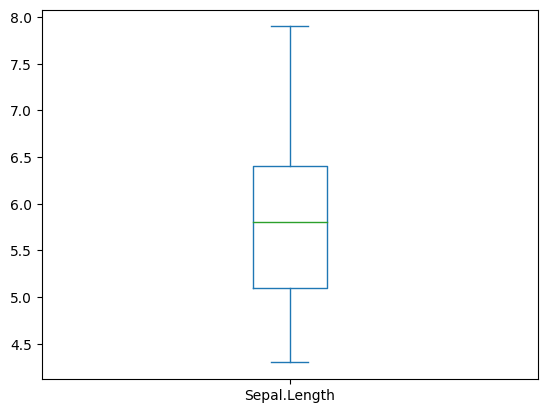

In [30]:
data['Sepal.Length'].plot(kind='box')

In [31]:
quantile=data['Sepal.Length'].quantile([0.0,0.25,0.50,0.75,1])
quantile

0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: Sepal.Length, dtype: float64

### Practical 3:

Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset.

In [32]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

#### Wine Dataset

In [33]:
wine=load_wine()
df1=pd.DataFrame(wine.data, columns=wine.feature_names)
df1['Class']=wine.target

In [34]:
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [35]:
len(df1.columns)

14

In [36]:
x1=df1.iloc[:,:13]
print('Mean: ',x1.mean())
print('Standard Deviation: ',x1.std())

Mean:  alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64
Standard Deviation:  alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_inten

In [37]:
#Standardizing the wine dataset
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaled_data=scaler1.fit_transform(x1)

In [38]:
scaled_wine_data=pd.DataFrame(scaled_data, columns=x1.columns)
scaled_wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [39]:
print('Mean: ',scaled_wine_data.mean())
print('Standard Deviation: ',scaled_wine_data.std())

Mean:  alcohol                         7.841418e-15
malic_acid                      2.444986e-16
ash                            -4.059175e-15
alcalinity_of_ash              -7.110417e-17
magnesium                      -2.494883e-17
total_phenols                  -1.955365e-16
flavanoids                      9.443133e-16
nonflavanoid_phenols           -4.178929e-16
proanthocyanins                -1.540590e-15
color_intensity                -4.129032e-16
hue                             1.398382e-15
od280/od315_of_diluted_wines    2.126888e-15
proline                        -6.985673e-17
dtype: float64
Standard Deviation:  alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids                      1.002821
nonflavanoid_phenols            1.002821
proanthocyanins                 1.002821
col

#### Iris Dataset

In [40]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['Class']=iris.target

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
len(df.columns)

5

In [43]:
x=df.iloc[:,:4]
print('Mean: ',x.mean())
print('Standard Deviation: ',x.std())

Mean:  sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard Deviation:  sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [44]:
#Standardizing Iris Dataset
scaler=StandardScaler()
scaled_iris_data=scaler.fit_transform(x)
scaled_iris_data=pd.DataFrame(scaled_iris_data, columns=x.columns)
scaled_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [45]:
print('Mean: ',scaled_iris_data.mean())
print('Standard Deviation: ',scaled_iris_data.std())

Mean:  sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
Standard Deviation:  sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## Section 2: Data Mining Techniques

Run following algorithms on 2 real datasets and use appropriate evaluation measures to compute correctness of obtained patterns: 

### Practical 4:

Run Apriori algorithm to find frequent itemsets and association rules 

In [46]:
from efficient_apriori import apriori

#### Dataset 1

In [47]:
data=pd.read_csv('groceries_data.csv')
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
data.shape

(9835, 33)

In [49]:
data['Item(s)'].value_counts()

Item(s)
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
32       1
27       1
28       1
24       1
Name: count, dtype: int64

In [50]:
data.isnull().sum()

Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

In [51]:
data.dropna(thresh=5, inplace=True)
data.shape

(4734, 33)

In [52]:
data.isnull().sum()

Item(s)       0
Item 1        0
Item 2        0
Item 3        0
Item 4        0
Item 5     1005
Item 6     1860
Item 7     2505
Item 8     3050
Item 9     3488
Item 10    3838
Item 11    4084
Item 12    4266
Item 13    4383
Item 14    4461
Item 15    4538
Item 16    4593
Item 17    4639
Item 18    4668
Item 19    4682
Item 20    4696
Item 21    4705
Item 22    4716
Item 23    4720
Item 24    4726
Item 25    4727
Item 26    4727
Item 27    4728
Item 28    4729
Item 29    4730
Item 30    4733
Item 31    4733
Item 32    4733
dtype: int64

In [53]:
4734-1005

3729

In [54]:
data.dropna(thresh=3729, inplace=True, axis=1)
data.shape

(4734, 6)

In [55]:
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)


In [56]:
data.isnull().sum()

Item(s)       0
Item 1        0
Item 2        0
Item 3        0
Item 4        0
Item 5     1005
dtype: int64

In [57]:
data=data.fillna(method='ffill',limit=3)
data.isnull().sum()

Item(s)     0
Item 1      0
Item 2      0
Item 3      0
Item 4      0
Item 5     14
dtype: int64

In [58]:
data=data.fillna(method='bfill',limit=3)
data.isnull().sum()

Item(s)    0
Item 1     0
Item 2     0
Item 3     0
Item 4     0
Item 5     0
dtype: int64

In [59]:
data.drop('Item(s)',inplace=True,axis=1)

In [60]:
data1=data.values.tolist()

1.1 Use minimum support as 20% and minimum confidence as 50% 

In [61]:
itemsets, rules=apriori(data1, min_support=0.2, min_confidence=0.5)
itemsets

{1: {('other vegetables',): 1497, ('whole milk',): 1792}}

In [62]:
rules

[]

1.2 Use minimum support as 40% and minimum confidence as 40 % 


In [63]:
itemsets, rules=apriori(data1, min_support=0.3, min_confidence=0.3)
itemsets

{1: {('other vegetables',): 1497, ('whole milk',): 1792}}

In [64]:
rules

[]

In [65]:
items=data.stack()

Text(0, 0.5, 'Frequency')

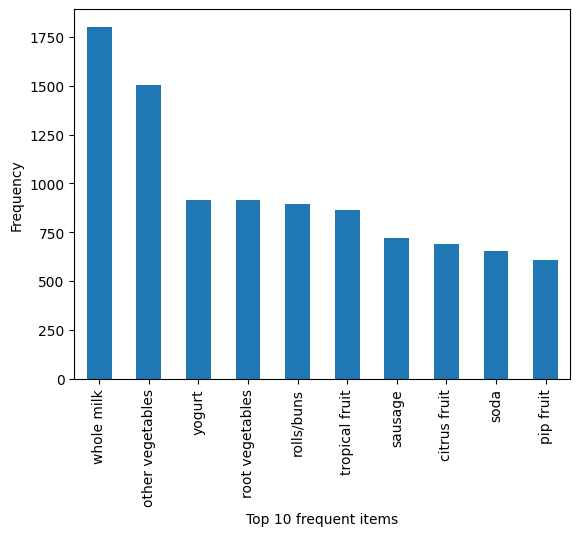

In [66]:
plt.figure()
items.value_counts().head(10).plot(kind='bar')
plt.xlabel('Top 10 frequent items')
plt.ylabel('Frequency')

#### Dataset 2

In [67]:
data2=pd.read_csv('store_data.csv', header=None)
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
data2.shape

(7501, 20)

In [69]:
data2.columns=['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Item9','Item10','Item11','Item12','Item13','Item14','Item15','Item16','Item17','Item18','Item19','Item20']

In [70]:
data2.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data2.isnull().sum()

Item1        0
Item2     1754
Item3     3112
Item4     4156
Item5     4972
Item6     5637
Item7     6132
Item8     6520
Item9     6847
Item10    7106
Item11    7245
Item12    7347
Item13    7414
Item14    7454
Item15    7476
Item16    7493
Item17    7497
Item18    7497
Item19    7498
Item20    7500
dtype: int64

In [72]:
data2.dropna(thresh=5, inplace=True)
data2.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data2.isnull().sum()

Item1        0
Item2        0
Item3        0
Item4        0
Item5        0
Item6      665
Item7     1160
Item8     1548
Item9     1875
Item10    2134
Item11    2273
Item12    2375
Item13    2442
Item14    2482
Item15    2504
Item16    2521
Item17    2525
Item18    2525
Item19    2526
Item20    2528
dtype: int64

In [74]:
data2.shape

(2529, 20)

In [75]:
2529-665

1864

In [76]:
data2.dropna(thresh=1864, inplace=True, axis=1)
data2.head()

,Item1,Item2,Item3,Item4,Item5,Item6
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN
12,turkey,burgers,mineral water,eggs,cooking oil,NaN
16,shrimp,chocolate,chicken,honey,oil,cooking oil
18,turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea


In [77]:
data2.isnull().sum()

Item1      0
Item2      0
Item3      0
Item4      0
Item5      0
Item6    665
dtype: int64

In [78]:
data2=data2.fillna(method='ffill', limit=3)
data2.isnull().sum()

Item1     0
Item2     0
Item3     0
Item4     0
Item5     0
Item6    11
dtype: int64

In [79]:
data2=data2.fillna(method='bfill',limit=3)
data2.isnull().sum()

Item1    0
Item2    0
Item3    0
Item4    0
Item5    0
Item6    0
dtype: int64

In [80]:
data_2=data2.values.tolist()

1.1 Use minimum support as 30% and minimum confidence as 25%

In [81]:
itemsets, rules=apriori(data_2, min_support=0.3, min_confidence=0.25)
itemsets

{1: {('mineral water',): 1069, ('spaghetti',): 869}}

In [82]:
rules

[]

1.2 Use minimum support as 20% and minimum confidence as 20 %

In [83]:
itemsets, rules= apriori(data_2, min_support=0.2, min_confidence=0.2)
itemsets

{1: {('mineral water',): 1069,
  ('milk',): 622,
  ('eggs',): 603,
  ('chocolate',): 655,
  ('spaghetti',): 869,
  ('ground beef',): 548,
  ('frozen vegetables',): 511}}

In [84]:
rules

[]

Text(0, 0.5, 'Frequency')

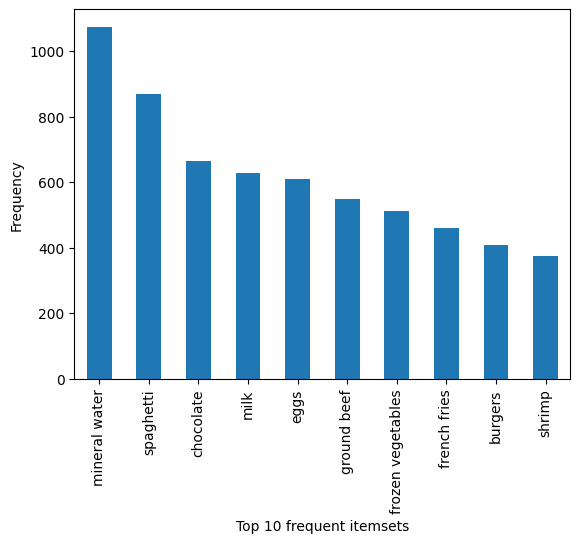

In [85]:
items1=data2.stack()
plt.figure()
items1.value_counts().head(10).plot(kind='bar')
plt.xlabel('Top 10 frequent itemsets')
plt.ylabel('Frequency')

### Practical 5:

Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations: 

5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%<br>
5.2 Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.<br>
5.3 Data is scaled to standard format.

#### Iris Dataset

In [86]:
from sklearn.datasets import load_iris
iris=load_iris()

In [87]:
X=iris.data
y=iris.target

In [88]:
iris_df=pd.DataFrame(X, columns=iris.feature_names)
iris_df['class']=y

In [89]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [90]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [91]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [92]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [93]:
scaler=StandardScaler()
scaled_iris=scaler.fit_transform(iris_df.iloc[:,:-1])

In [94]:
X=pd.DataFrame(scaled_iris, columns=iris.feature_names)
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444


5.1 a) Training set = 75% Test set = 25%

### Holdout Method

In [95]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [96]:
dec_tree=DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

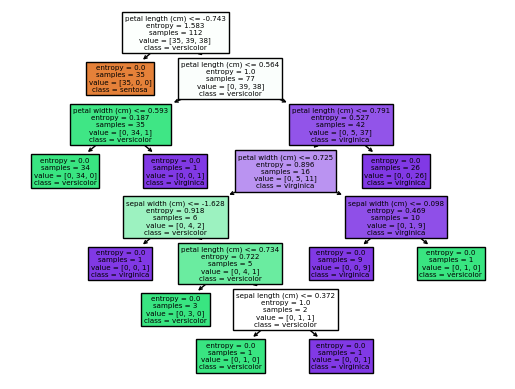

In [97]:
tree.plot_tree(dec_tree,feature_names=iris.feature_names,class_names=['sentosa','versicolor','virginica'],filled=True);

In [98]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

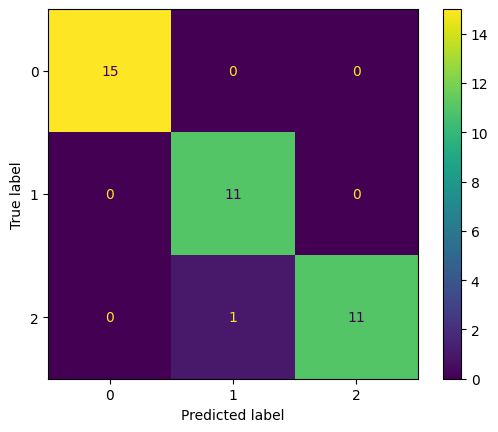

In [99]:
ConfusionMatrixDisplay.from_estimator(dec_tree, X_test, Y_test)

In [100]:
prediction=dec_tree.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [101]:
acc_holdout_dec=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_dec

97.36842105263158

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


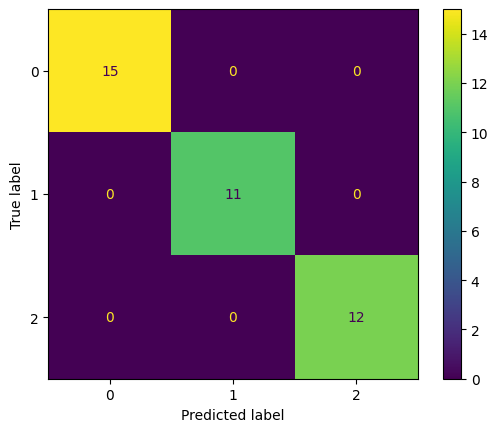

In [102]:
#K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
prediction=knn.predict(X_test)
print(prediction)

ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test);

In [103]:
acc_holdout_knn=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_knn

100.0

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


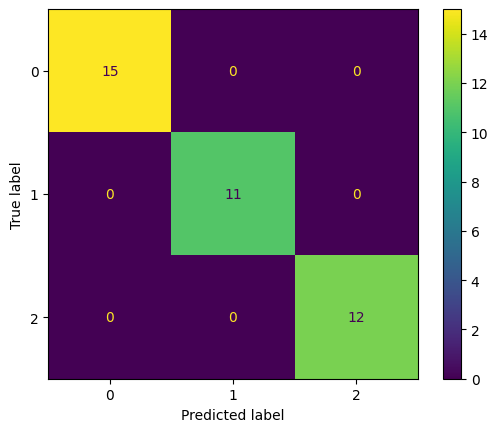

In [104]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
prediction=nb.predict(X_test)
print(prediction)

ConfusionMatrixDisplay.from_estimator(nb, X_test, Y_test);

In [105]:
acc_holdout_nb=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_nb

100.0

In [106]:
#For holdout method
print('Accuracy on test data using Decision Tree classifier: ', acc_holdout_dec)
print('Accuracy on test data using K Nearest Neighbour: ', acc_holdout_knn)
print('Accuracy on test data using Naive Bayes classifier: ', acc_holdout_nb)

Accuracy on test data using Decision Tree classifier:  97.36842105263158
Accuracy on test data using K Nearest Neighbour:  100.0
Accuracy on test data using Naive Bayes classifier:  100.0


### Random Subsampling

In [107]:
# Decision Tree
acc=[]
dec_tree=DecisionTreeClassifier(criterion='entropy')

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.25, random_state=i+1)
    
    dec_tree.fit(X_train, Y_train)
    prediction=dec_tree.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [108]:
accuracy_rs_dec=acc*100
accuracy_rs_dec

94.73684210526315

In [109]:
# KNN
acc=[]
knn=KNeighborsClassifier()

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.25, random_state=i+1)
    
    knn.fit(X_train, Y_train)
    prediction=knn.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [110]:
accuracy_rs_knn=acc*100
accuracy_rs_knn

95.26315789473682

In [111]:
#Naive Bayes Classifier

acc=[]
nb=GaussianNB()

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.25, random_state=i+1)
    
    nb.fit(X_train, Y_train)
    prediction=nb.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [112]:
accuracy_rs_nb=acc*100
accuracy_rs_nb

94.73684210526315

In [113]:
#For random subsampling method
print('Accuracy on test data using Decision Tree classifier: ', accuracy_rs_dec)
print('Accuracy on test data using K Nearest Neighbour: ', accuracy_rs_knn)
print('Accuracy on test data using Naive Bayes classifier: ', accuracy_rs_nb)

Accuracy on test data using Decision Tree classifier:  94.73684210526315
Accuracy on test data using K Nearest Neighbour:  95.26315789473682
Accuracy on test data using Naive Bayes classifier:  94.73684210526315


### Cross Validation

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [115]:
#Decision Tree

dec_tree=DecisionTreeClassifier(criterion='entropy')
score_dec=cross_val_score(dec_tree,X,y,cv=4)
acc_cv_dec=score_dec.mean()*100
acc_cv_dec

96.67496443812233

In [116]:
#KNN

knn=KNeighborsClassifier()
score_knn=cross_val_score(knn,X,y,cv=4)
acc_cv_knn=score_knn.mean()*100
acc_cv_knn

94.66571834992888

In [117]:
#Naive Bayes

nb=GaussianNB()
score_nb=cross_val_score(nb,X,y,cv=4)
acc_cv_nb=score_nb.mean()*100
acc_cv_nb

95.34139402560456

In [118]:
#For cross validation method
print('Accuracy on test data using Decision Tree classifier: ', acc_cv_dec)
print('Accuracy on test data using K Nearest Neighbour: ', acc_cv_knn)
print('Accuracy on test data using Naive Bayes classifier: ', acc_cv_nb)

Accuracy on test data using Decision Tree classifier:  96.67496443812233
Accuracy on test data using K Nearest Neighbour:  94.66571834992888
Accuracy on test data using Naive Bayes classifier:  95.34139402560456


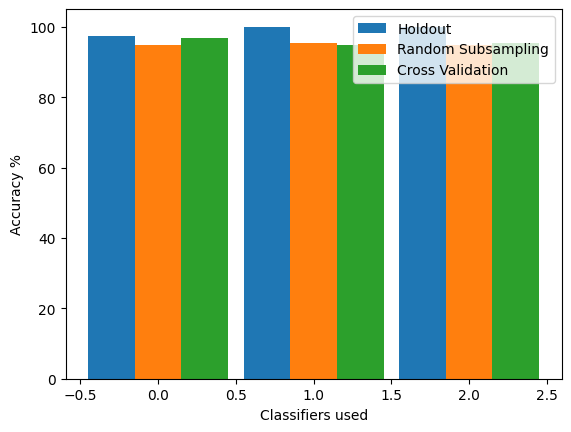

In [119]:
x=['Decision Tree','KNN','Naive Bayes']
y_holdout=[acc_holdout_dec, acc_holdout_knn, acc_holdout_nb]
y_rs=[accuracy_rs_dec,accuracy_rs_knn,accuracy_rs_nb]
y_cv=[acc_cv_dec,acc_cv_knn,acc_cv_nb]

X_axis=np.arange(len(x))

plt.bar(X_axis-0.3,y_holdout,0.3,label='Holdout')
plt.bar(X_axis,y_rs,0.3,label='Random Subsampling')
plt.bar(X_axis+0.3,y_cv,0.3,label='Cross Validation')



plt.xlabel('Classifiers used')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

### Holdout Method

In [120]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.33, random_state=1)

In [121]:
dec_tree=DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

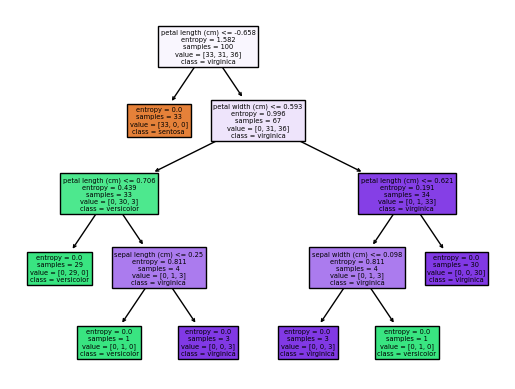

In [122]:
tree.plot_tree(dec_tree,feature_names=iris.feature_names,class_names=['sentosa','versicolor','virginica'],filled=True);

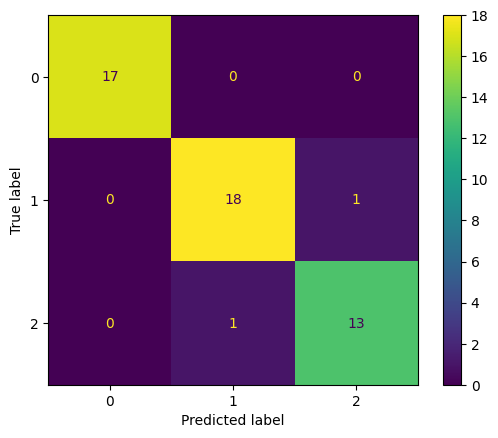

In [123]:
ConfusionMatrixDisplay.from_estimator(dec_tree, X_test, Y_test)

In [124]:
prediction=dec_tree.predict(X_test)
prediction

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

In [125]:
acc_holdout_dec=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_dec

96.0

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]


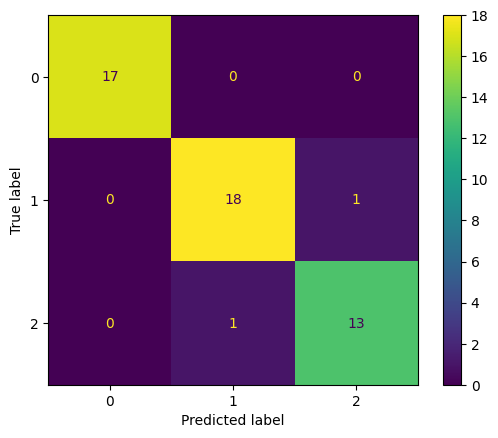

In [126]:
#K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
prediction=knn.predict(X_test)
print(prediction)

ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test);

In [127]:
acc_holdout_knn=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_knn

96.0

[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]


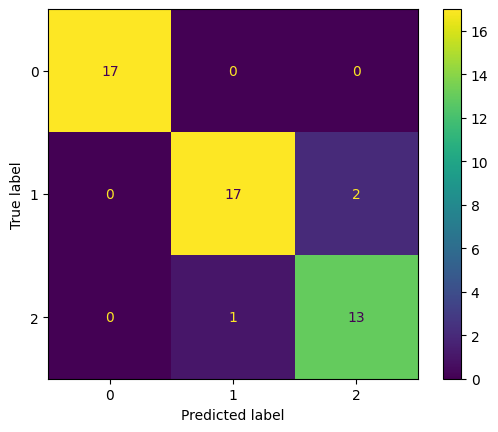

In [128]:
#Naive Bayes
nb=GaussianNB()
nb.fit(X_train,Y_train)
prediction=nb.predict(X_test)
print(prediction)

ConfusionMatrixDisplay.from_estimator(nb, X_test, Y_test);

In [129]:
acc_holdout_nb=metrics.accuracy_score(Y_test, prediction)*100
acc_holdout_nb

94.0

In [130]:
#For holdout method
print('Accuracy on test data using Decision Tree classifier: ', acc_holdout_dec)
print('Accuracy on test data using K Nearest Neighbour: ', acc_holdout_knn)
print('Accuracy on test data using Naive Bayes classifier: ', acc_holdout_nb)

Accuracy on test data using Decision Tree classifier:  96.0
Accuracy on test data using K Nearest Neighbour:  96.0
Accuracy on test data using Naive Bayes classifier:  94.0


### Random Subsampling

In [131]:
# Decision Tree
acc=[]
dec_tree=DecisionTreeClassifier(criterion='entropy')

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.33, random_state=i+1)
    
    dec_tree.fit(X_train, Y_train)
    prediction=dec_tree.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [132]:
accuracy_rs_dec=acc*100
accuracy_rs_dec

94.19999999999999

In [133]:
# KNN
acc=[]
knn=KNeighborsClassifier()

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.33, random_state=i+1)
    
    knn.fit(X_train, Y_train)
    prediction=knn.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [134]:
accuracy_rs_knn=acc*100
accuracy_rs_knn

95.19999999999997

In [135]:
#Naive Bayes Classifier

acc=[]
nb=GaussianNB()

for i in range(10):
    X_train,X_test,Y_train, Y_test=train_test_split(X,y, test_size=0.33, random_state=i+1)
    
    nb.fit(X_train, Y_train)
    prediction=nb.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,prediction))
    
acc=sum(acc)/len(acc)

In [136]:
accuracy_rs_nb=acc*100
accuracy_rs_nb

94.80000000000001

In [137]:
#For random subsampling method
print('Accuracy on test data using Decision Tree classifier: ', accuracy_rs_dec)
print('Accuracy on test data using K Nearest Neighbour: ', accuracy_rs_knn)
print('Accuracy on test data using Naive Bayes classifier: ', accuracy_rs_nb)

Accuracy on test data using Decision Tree classifier:  94.19999999999999
Accuracy on test data using K Nearest Neighbour:  95.19999999999997
Accuracy on test data using Naive Bayes classifier:  94.80000000000001


### Cross Validation

In [138]:
#Decision Tree

dec_tree=DecisionTreeClassifier(criterion='entropy')
score_dec=cross_val_score(dec_tree,X,y,cv=4)
acc_cv_dec=score_dec.mean()*100
acc_cv_dec

96.67496443812233

In [139]:
#KNN

knn=KNeighborsClassifier()
score_knn=cross_val_score(knn,X,y,cv=4)
acc_cv_knn=score_knn.mean()*100
acc_cv_knn

94.66571834992888

In [140]:
#Naive Bayes

nb=GaussianNB()
score_nb=cross_val_score(nb,X,y,cv=4)
acc_cv_nb=score_nb.mean()*100
acc_cv_nb

95.34139402560456

In [141]:
#For cross validation method
print('Accuracy on test data using Decision Tree classifier: ', acc_cv_dec)
print('Accuracy on test data using K Nearest Neighbour: ', acc_cv_knn)
print('Accuracy on test data using Naive Bayes classifier: ', acc_cv_nb)

Accuracy on test data using Decision Tree classifier:  96.67496443812233
Accuracy on test data using K Nearest Neighbour:  94.66571834992888
Accuracy on test data using Naive Bayes classifier:  95.34139402560456


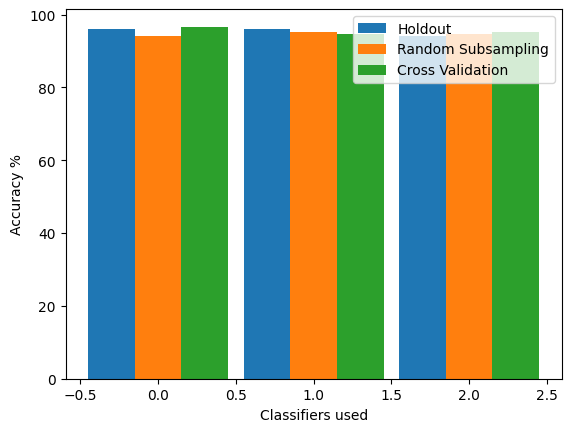

In [142]:
x=['Decision Tree','KNN','Naive Bayes']
y_holdout=[acc_holdout_dec, acc_holdout_knn, acc_holdout_nb]
y_rs=[accuracy_rs_dec,accuracy_rs_knn,accuracy_rs_nb]
y_cv=[acc_cv_dec,acc_cv_knn,acc_cv_nb]

X_axis=np.arange(len(x))

plt.bar(X_axis-0.3,y_holdout,0.3,label='Holdout')
plt.bar(X_axis,y_rs,0.3,label='Random Subsampling')
plt.bar(X_axis+0.3,y_cv,0.3,label='Cross Validation')



plt.xlabel('Classifiers used')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

### Practical 6:

Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

In [143]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [144]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['class'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [145]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_iris.iloc[:, :-1])
df_iris_scaled = pd.DataFrame(scaled_X, columns = list(df_iris.columns)[:-1])
df_iris_scaled['class'] = df_iris['class']
df_iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


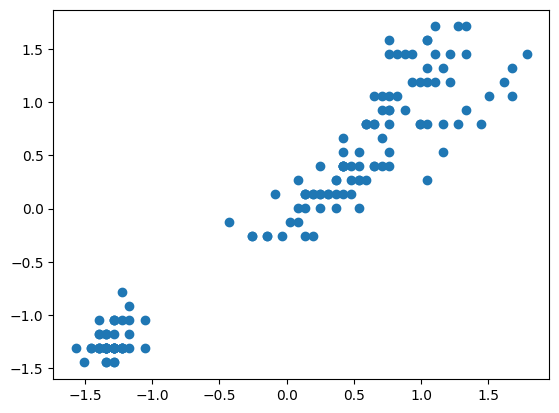

In [146]:
plt.scatter(df_iris_scaled['petal length (cm)'], df_iris_scaled['petal width (cm)']);

In [147]:
X = df_iris_scaled.iloc[:, :-1]
Y = df_iris_scaled["class"]

### Using K-Means Clustering

In [148]:
kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto')
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=1)

In [149]:
center = kmeans.cluster_centers_
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

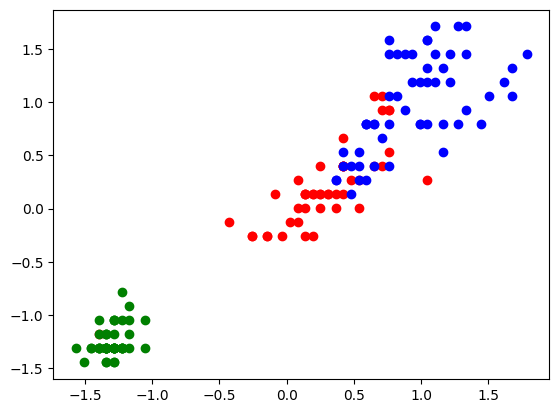

In [150]:
temp1 = X[identified_clusters == 0]
temp2 = X[identified_clusters == 1]
temp3 = X[identified_clusters == 2]

plt.scatter(temp1.iloc[:,2], temp1.iloc[:, 3], color = "red")
plt.scatter(temp2.iloc[:,2], temp2.iloc[:, 3], color = "green")
plt.scatter(temp3.iloc[:,2], temp3.iloc[:, 3], color = "blue")
plt.show()

### DBScan

In [151]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

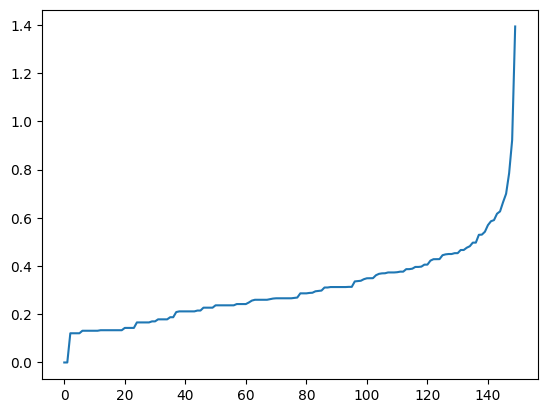

In [152]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances);

In [153]:
dbscan = DBSCAN(eps = 0.6, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=3)

In [154]:
identified_clusters_db = dbscan.fit_predict(X)
identified_clusters_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [155]:
unique_clusters = np.unique(identified_clusters_db)
li = [X[identified_clusters_db == unique_clusters[i]] for i in range(len(unique_clusters))]

In [156]:
import random
no_of_colors = len(li)
color = ["#"+"".join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]

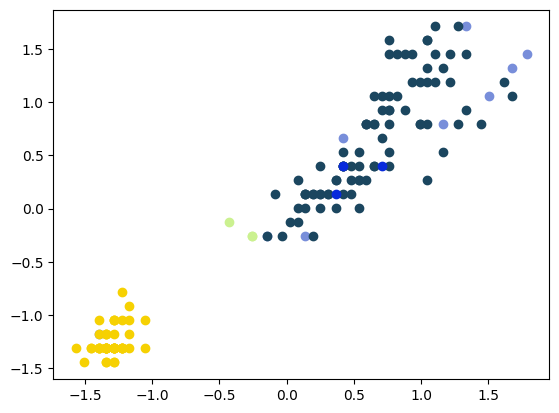

In [157]:
for i in range(len(li)):
    plt.scatter(li[i].iloc[:, 2], li[i].iloc[:, 3], color = color[i])
plt.show()

### Hierarchical Clustering

In [158]:
from sklearn.cluster import AgglomerativeClustering

In [159]:
hier_clus = AgglomerativeClustering(n_clusters = 3)
hier_clus.fit(X)
identified_clusters_hc = hier_clus.fit_predict(X)
identified_clusters_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

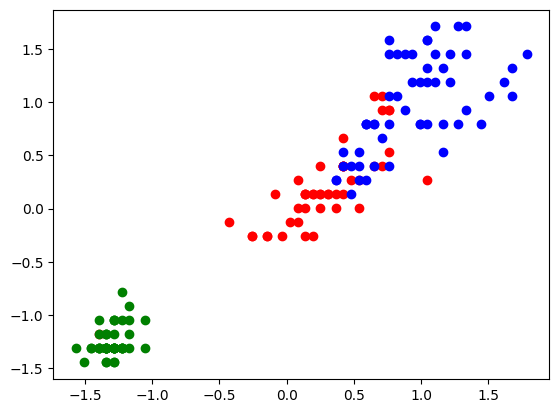

In [160]:
temp1 = X[identified_clusters == 0]
temp2 = X[identified_clusters == 1]
temp3 = X[identified_clusters == 2]

plt.scatter(temp1.iloc[:,2], temp1.iloc[:, 3], color = "red")
plt.scatter(temp2.iloc[:,2], temp2.iloc[:, 3], color = "green")
plt.scatter(temp3.iloc[:,2], temp3.iloc[:, 3], color = "blue")
plt.show()

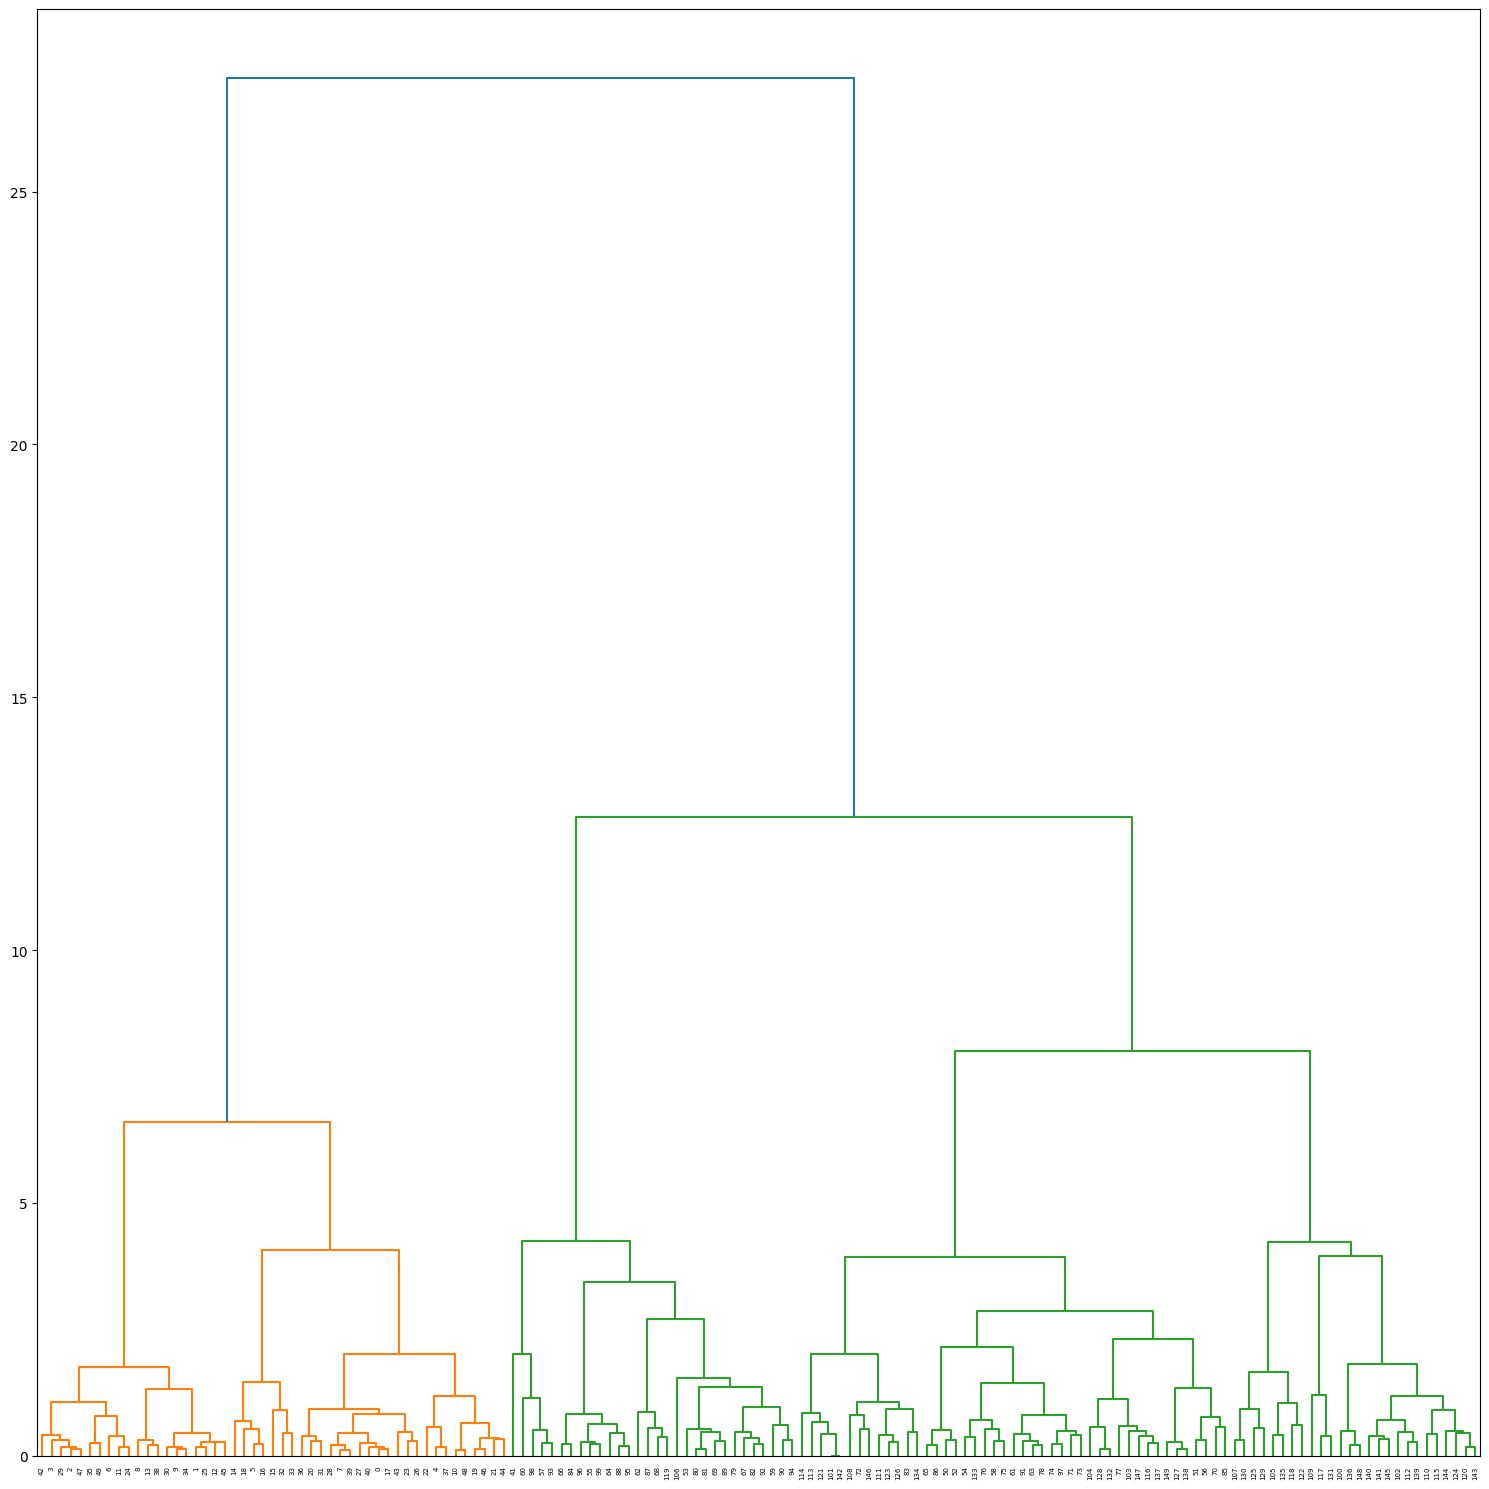

In [161]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(X, method = "ward")
plt.figure(figsize=(15,15))
dendrogram = hierarchy.dendrogram(clusters)
plt.tight_layout()